In [2]:
from keras import layers
from keras import models

Using TensorFlow backend.
/home/statistics3/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:519: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
/home/statistics3/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:520: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
/home/statistics3/anaconda3/lib/python3.6/site-packages/tensorflow/python/framework/dtypes.py:521: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
/home/statistics3/anaconda3/lib/python3.6

In [3]:
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), activation = "relu", input_shape = (150, 150, 3)))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(64, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation ="relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Conv2D(128, (3, 3), activation = "relu"))
model.add(layers.MaxPool2D((2, 2)))
model.add(layers.Flatten())
model.add(layers.Dense(512, activation="relu"))
model.add(layers.Dense(1, activation="sigmoid"))

model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 15, 15, 128)       147584    
__________

In [4]:
# モデルのコンパイル
from keras import optimizers

model.compile(loss = "binary_crossentropy", 
                optimizer=optimizers.RMSprop(), metrics=["acc"])

## データの前処理
- 手順は以下の通り
    - 画像ファイルを読み込む
    - JPEGファイルの内容をRGBのピクセルに変換
    - これらの、ピクセル値を、float型のtensorに変換
    - [0, 255] の範囲を[0, 1]に変換する

In [9]:
from keras.preprocessing.image import ImageDataGenerator
import os

base_dir = "./data/cats_and_dogs_small"

train_dir = os.path.join(base_dir, 'train')
val_dir = os.path.join(base_dir, "validation")
test_dir = os.path.join(base_dir, "test")


# all images are divided 255
train_datagen = ImageDataGenerator(rescale = 1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_data = train_datagen.flow_from_directory(
    train_dir, target_size = (150, 150), 
    batch_size = 20, 
    class_mode = "binary"
)

val_data = test_datagen.flow_from_directory(
    val_dir,
    target_size = (150, 150), 
    batch_size= 20, 
    class_mode= "binary" 
)


Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [10]:
# steps_per_epoch は2000個の学習データに対して,batch size = 20 より、すべて取り出すには,100必要
history = model.fit_generator(train_data, 
                              steps_per_epoch = 100, 
                              epochs = 30, 
                              validation_data = val_data, 
                              validation_steps = 50)

Epoch 1/30
100/100 [==============================] - 7s 69ms/step - loss: 0.7320 - acc: 0.5325 - val_loss: 0.6849 - val_acc: 0.5000
Epoch 2/30
100/100 [==============================] - 4s 44ms/step - loss: 0.6652 - acc: 0.5955 - val_loss: 0.6885 - val_acc: 0.6040
Epoch 3/30
100/100 [==============================] - 4s 43ms/step - loss: 0.6348 - acc: 0.6655 - val_loss: 0.6325 - val_acc: 0.6460
Epoch 4/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5869 - acc: 0.7080 - val_loss: 0.5894 - val_acc: 0.6970
Epoch 5/30
100/100 [==============================] - 4s 45ms/step - loss: 0.5399 - acc: 0.7360 - val_loss: 0.6014 - val_acc: 0.7080
Epoch 6/30
100/100 [==============================] - 5s 46ms/step - loss: 0.5019 - acc: 0.7620 - val_loss: 0.6117 - val_acc: 0.7010
Epoch 7/30
100/100 [==============================] - 5s 46ms/step - loss: 0.4319 - acc: 0.8050 - val_loss: 0.7529 - val_acc: 0.6950
Epoch 8/30
100/100 [==============================] - 4s 45ms/step - 

In [11]:
# save models paramers
model.save("cnn_1.h5")

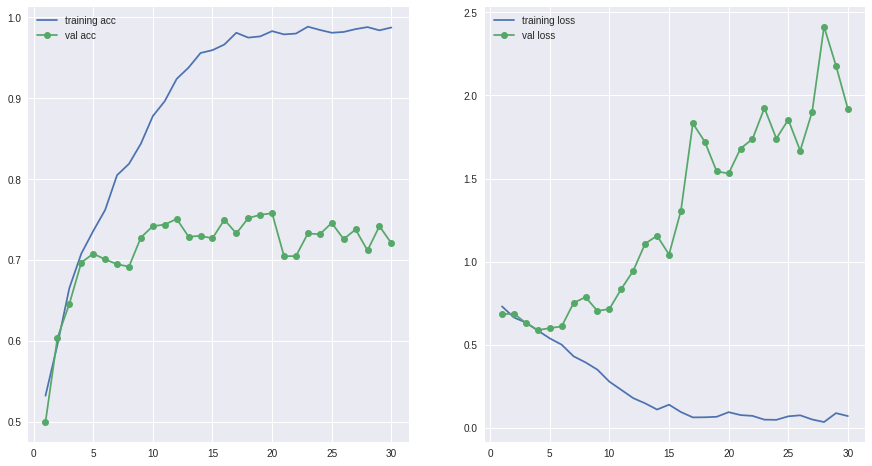

In [14]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.style.use("seaborn")
%matplotlib inline

acc = history.history["acc"]
val_acc = history.history["val_acc"]
loss = history.history["loss"]
val_loss = history.history["val_loss"]

epochs = range(1, len(acc) + 1)

# plot the accuracy curve

plt.figure(figsize = (15, 8))
plt.subplot(1, 2, 1)
plt.plot(epochs, acc, "-", label = "training acc")
plt.plot(epochs, val_acc, "o-", label = "val acc")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, loss, "-", label = "training loss")
plt.plot(epochs, val_loss, "o-", label = "val loss")
plt.legend()

plt.show()

- 上のプロットの結果より、過学習しているよ
- 正答率は、70%近辺で頭打ち